In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
import random
from matplotlib.animation import FuncAnimation
from IPython import display

In [2]:
from time import time
def runtime(t0):
    dt = time() - t0
    if dt < 60:
        message = f'{dt:.0f} sec.'
    elif dt < 3600:
        message = f'{dt/60:.0f} min.'
    else:
        h = int(dt//3600)
        m = int((dt%3600) / 60)
        message = f'{h} h. {m} min.'
    print(message)

In [5]:
from matplotlib import animation

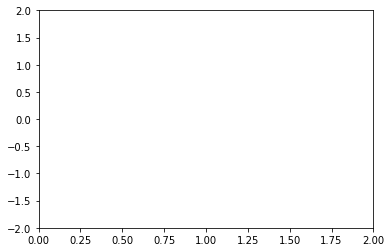

In [9]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# plt.show()

In [23]:
class Particle():
    def __init__(self, initial_state=[10, 10, 10, 10], box_size=100, color='b'):
        self.x  = initial_state[0]
        self.y  = initial_state[1]
        self.vx = initial_state[2]
        self.vy = initial_state[3]
        self.box_size = box_size
        self.color = color
        
    def get_position(self):
        return self.x, self.y
    
    def get_velocity(self):
        return self.vx, self.vy
    
    def get_color(self):
        return self.color
    
    def move(self, dt):
        if (self.x < 0 or self.x > self.box_size):
            # particle at the x boundary
            self.vx = - self.vx
            
        if (self.y < 0 or self.y > self.box_size):
            # particle at the y boundary
            self.vy = - self.vy
            
        self.x += self.vx * dt
        self.y += self.vy * dt

In [54]:
t0 = time()
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
lines = ax.plot([], 'o')
line = lines[0]
# Construct the scatter that will update during animation
# scat = ax.scatter([], [], edgecolors='b',
#                   facecolors='b')

# other static stuff
ax.set_aspect('equal')
box_size = 200
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
time_text = ax.text(40, box_size+2, '')

num_particles = 250
vmax = .05
particles = []
for _ in range(num_particles):
    x0  = box_size*random.uniform(0, 1)
    y0  = box_size*random.uniform(0, 1)
    vx0 = vmax*random.uniform(-1, 1)
    vy0 = vmax*random.uniform(-1, 1)
    initial_state1 = [x0, y0, vx0, vy0]
    p = Particle(initial_state=initial_state1, 
                 box_size=box_size)
    particles.append(p)
    


p0 = Particle(initial_state=[102, 25, vmax*30, vmax*30], 
              box_size=box_size, color='r')
particles.append(p0)

def init():
    """initialize animation"""
    line.set_data([], [])
#     scat.set_offsets()
    time_text.set_text('')
        
    return line, time_text

def animate(frame):
    x, y = [], []
    for p in particles:
        p.move(1)
        xy = p.get_position()
        x.append(xy[0])
        y.append(xy[1])
    line.set_data((x, y))
    line.set_color(color='limegreen')
    
    if frame % 10 == 0:
        time_text.set_text(f'time = {frame:.0f}')
    return line, time_text

num_loops = 2
    
animt = FuncAnimation(fig, animate, init_func=init, frames=100*num_loops, interval=30, repeat=True)
video = animt.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
runtime(t0)

10 sec.


In [5]:
animt.save('animt.gif', writer='imagemagick')